In [2]:
import os
import time
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [4]:
data = pd.read_csv('F:\ML_Hospitability\Data\Data-final.csv')
print(data)

      P_RADIUS_EST   P_MASS_EST  P_SEMI_MAJOR_AXIS_EST     P_PERIOD  \
0        12.082709  6165.863300                1.29000   326.030000   
1        12.229641  4684.784800                1.53000   516.219970   
2        12.848516  1525.574400                0.83000   185.840000   
3        12.865261  1481.078500                2.93000  1773.400000   
4        13.421749   565.733850                1.66000   798.500000   
...            ...          ...                    ...          ...   
2908      1.870000     4.155456                0.13456    28.165600   
2909      2.760000     8.047485                0.05769     7.906961   
2910      1.102775     1.380000                0.02100     3.204000   
2911      1.178333     1.750000                0.03500     6.689000   
2912      1.164989     1.680000                0.05400    13.031000   

          P_FLUX  P_TEMP_EQUIL  S_MASS   S_RADIUS  S_TEMPERATURE  \
0     101.011410     799.44963    2.70  19.000000         4742.0   
1     107.3

In [5]:
data_set = data.values
print(data_set)
X = data_set[:,0:12]
Y = data_set[:,12]
print(Y)

[[1.2082709e+01 6.1658633e+03 1.2900000e+00 ... 1.0132812e+01
  2.4763411e+01 0.0000000e+00]
 [1.2229641e+01 4.6847848e+03 1.5300000e+00 ... 1.2770059e+01
  3.1984271e+01 0.0000000e+00]
 [1.2848516e+01 1.5255744e+03 8.3000000e-01 ... 6.0252302e+00
  1.4680087e+01 0.0000000e+00]
 ...
 [1.1027747e+00 1.3800000e+00 2.1000000e-02 ... 3.3496509e-02
  8.9215788e-02 0.0000000e+00]
 [1.1783333e+00 1.7500000e+00 3.5000000e-02 ... 3.3496509e-02
  8.9215788e-02 1.0000000e+00]
 [1.1649890e+00 1.6800000e+00 5.4000000e-02 ... 3.3496509e-02
  8.9215788e-02 1.0000000e+00]]
[0. 0. 0. ... 0. 1. 1.]


In [6]:
scaler = preprocessing.MinMaxScaler()
X_scale = scaler.fit_transform(X)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
#data being broken into sections

In [8]:
model = Sequential([
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(12,)),
    Dropout(0.3),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50
64/64 [==============================] - 1s 5ms/step - loss: 1.7537 - accuracy: 0.9711 - val_loss: 0.9041 - val_accuracy: 0.9794
Epoch 2/50
64/64 [==============================] - 0s 3ms/step - loss: 0.5944 - accuracy: 0.9799 - val_loss: 0.3677 - val_accuracy: 0.9794
Epoch 3/50
64/64 [==============================] - 0s 3ms/step - loss: 0.2761 - accuracy: 0.9799 - val_loss: 0.2083 - val_accuracy: 0.9794
Epoch 4/50
64/64 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9799 - val_loss: 0.1635 - val_accuracy: 0.9794
Epoch 5/50
64/64 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9799 - val_loss: 0.1485 - val_accuracy: 0.9794
Epoch 6/50
64/64 [==============================] - 0s 2ms/step - loss: 0.1481 - accuracy: 0.9799 - val_loss: 0.1422 - val_accuracy: 0.9794
Epoch 7/50
64/64 [==============================] - 0s 2ms/step - loss: 0.1412 - accuracy: 0.9799 - val_loss: 0.1397 - val_accuracy: 0.9794
Epoch 8/50
64/64 [==

In [10]:
model.evaluate(X_test, Y_test)[1]

14/14 [==============================] - 0s 962us/step - loss: 0.0717 - accuracy: 0.9886


0.9885583519935608

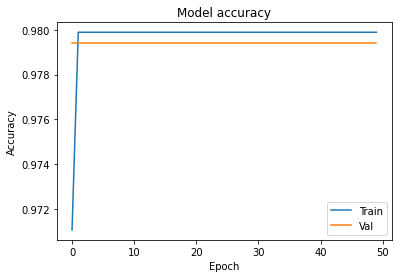

In [11]:
#visualising the training and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

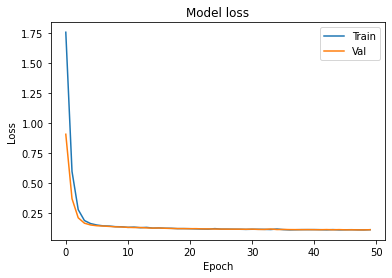

In [12]:
#visualising the training and validation losses
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()